# Proyecto | lectura, escritura, archivos de Big Data PySpark - Implementación

## Tema de interés y propuesta
--- 

El análisis de reseñas de productos publicadas en Amazon utilizando herramientas de Big Data, como PySpark, representa una oportunidad valiosa para estudiar el comportamiento del consumidor a gran escala. Amazon, como líder mundial en comercio electrónico y servicios tecnológicos a través de su plataforma AWS (Amazon Web Services), ofrece una base de datos masiva que permite explorar patrones de opinión y tendencias de mercado.

Se **propone desarrollar una solución que procese y analice grandes volúmenes de reseñas** con el objetivo general de identificar el sentimiento asociado a los productos, clasificándolo en positivo o negativo.

El interés en este tema surge de la necesidad profesional de fortalecer competencias en análisis de datos masivos y procesamiento de lenguaje natural (NLP), así como de la demanda creciente en el mercado por herramientas que faciliten la interpretación de la percepción del consumidor en entornos de venta en línea.

### Aplicaciones potenciales:

* Mejora de Productos: Analizar las reseñas puede ayudar a identificar problemas recurrentes o aspectos destacados de los productos, ayudando a los fabricantes a mejorar los diseños o la experiencia del cliente.
* Atención al Cliente y Soporte: Identificar rápidamente las reseñas negativas permite a las empresas abordar las preocupaciones de los clientes de manera eficiente, mejorando la satisfacción del cliente.
* Sistemas de Recomendación: El conjunto de datos puede usarse para mejorar los sistemas de recomendación, correlacionando las calificaciones de los productos, los sentimientos y las preferencias de los clientes.

## Dataset:
---

### **Selección**

**Nombre**: *Amazon Product Reviews*  
**Origen**: Este conjunto de datos proviene de [Kaggle](https://www.kaggle.com/datasets/machharavikiran/amazon-reviews). Es una colección de reseñas de productos publicadas por clientes de Amazon. El dataset está disponible públicamente en Kaggle para su análisis y exploración.

**Tamaño Global**:  
- **Tamaño estimado**: Aproximadamente 3.68 GB.

---

### **Descripción General**

Este conjunto de datos contiene reseñas de productos publicadas en Amazon, con un enfoque principal en productos electrónicos. La información es detallada, incluyendo las calificaciones de los usuarios, comentarios, votos útiles, y otros aspectos que permiten realizar un análisis profundo del comportamiento del consumidor y el sentimiento de las reseñas.

---

### **Atributos del Conjunto de Datos**

1. **marketplace**:  
   - Descripción: La región o país en el que se realizó la compra (por ejemplo, "US").
   - Tipo: Texto.

2. **customer_id**:  
   - Descripción: Un identificador único para el cliente que dejó la reseña.
   - Tipo: Numérico.

3. **review_id**:  
   - Descripción: Un identificador único para cada reseña.
   - Tipo: Texto.

4. **product_id**:  
   - Descripción: Un identificador único para el producto reseñado.
   - Tipo: Texto.

5. **product_parent**:  
   - Descripción: Un identificador de grupo o "padre" para productos similares o relacionados.
   - Tipo: Numérico.

6. **product_title**:  
   - Descripción: El nombre o título del producto que fue reseñado.
   - Tipo: Texto.

7. **product_category**:  
   - Descripción: La categoría a la que pertenece el producto (por ejemplo, "PC", "Electronics").
   - Tipo: Texto.

8. **star_rating**:  
   - Descripción: La calificación otorgada por el cliente, generalmente en una escala de 1 a 5 estrellas.
   - Tipo: Numérico.

9. **helpful_votes**:  
   - Descripción: El número de votos que otros usuarios han marcado como útiles para esta reseña.
   - Tipo: Numérico.

10. **total_votes**:  
    - Descripción: El número total de votos que ha recibido la reseña (útiles o no).
    - Tipo: Numérico.

11. **vine**:  
    - Descripción: Indica si la reseña fue parte del programa Vine de Amazon (Y para sí, N para no).
    - Tipo: Texto.

12. **verified_purchase**:  
    - Descripción: Indica si el producto fue verificado como comprado por el cliente (Y para sí, N para no).
    - Tipo: Texto.

13. **review_headline**:  
    - Descripción: El encabezado o título de la reseña proporcionado por el cliente.
    - Tipo: Texto.

14. **review_body**:  
    - Descripción: El cuerpo de la reseña, donde el cliente describe su experiencia con el producto.
    - Tipo: Texto.

15. **review_date**:  
    - Descripción: La fecha en que se publicó la reseña.
    - Tipo: Fecha.

16. **sentiment**:  
    - Descripción: Un valor binario que indica el sentimiento de la reseña (1 para positivo, 0 para negativo).
    - Tipo: Numérico.


## Análisis con PySpark
--- 


🚨 From this point forward, we will use English for the remainder of the notebook to maintain consistency with code syntax and findings.

> Note that to run this notebook, you'll need to install some dependencies. It's HIGHLY suggested to run this command to actually install it in a virtual environment by following this command:

`python3 -m venv venv && source venv/bin/activate && pip install findspark pyspark matplotlib seaborn setuptools`

In [1]:
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import StringType, DoubleType, FloatType

from os import path

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
findspark.init()
findspark.find()

'/Users/cesarivp/Documents/GitHub/TC4034.10-Equipo-37/venv/lib/python3.13/site-packages/pyspark'

In [3]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/27 13:58:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/27 13:58:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
PATH = "../files"
FILE = "amazon_electronics.csv"

In [5]:
class FileManager():
    @staticmethod
    def open_csv_file(input_path : str, file_name : str):
        """
        This method opens a csv file with pyspark
        """
        csv_df = spark.read.csv(
            path.join(input_path, file_name),
            header=True,
            inferSchema=True,
            multiLine=True,
            escape="\"",
            quote="\""
        )

        csv_df.show(truncate=20)

        return csv_df

In [6]:
class StatisticalAnalysisHelper():
    @staticmethod
    def dataset_dimensions(df_input):
        print("columns in the dataset:", len(df_input.columns))
        print("rows in the dataset:", df_input.count())

    @staticmethod
    def schema_information(df_input):
        """
        This method shows the current schema of the data.
        """
        df_input.printSchema()

    @staticmethod
    def descriptive_statistics(df_input):
        """
        This method shows the descriptive statistics of the data.
        """
        df_input.summary().show(truncate=False)

    @staticmethod
    def missing_values_table(df_input):
        """
        Displays a table with the count of missing values per column.
        """
        missing_exprs = []
        
        for c in df_input.schema.fields:
            field_name = c.name
            field_type = c.dataType
            
            if isinstance(field_type, (DoubleType, FloatType)):
                missing_exprs.append(
                    count(when(col(field_name).isNull() | isnan(col(field_name)), field_name)).alias(field_name)
                )
            elif isinstance(field_type, StringType):
                missing_exprs.append(
                    count(when(col(field_name).isNull() | (col(field_name) == ""), field_name)).alias(field_name)
                )
            else:
                missing_exprs.append(
                    count(when(col(field_name).isNull(), field_name)).alias(field_name)
                )

        df_missing_values = df_input.select(missing_exprs)

        return df_missing_values

In [7]:
class VisualAnalysisHelper:
    @staticmethod
    def missing_values_plot(df_missing_values):
        """
        This method shows the missing values and plots them.
        """
        df_missing_values_pd = df_missing_values.toPandas()

        df_missing_values_pd = df_missing_values_pd.melt(var_name="column", value_name="missing_count")

        plt.figure(figsize=(10,6))
        sns.barplot(x="column", y="missing_count", data=df_missing_values_pd)
        plt.xticks(rotation=45, ha='right')
        plt.title("Missing Values per Column")
        plt.tight_layout()
        plt.show()

    @staticmethod
    def column_distribution_plot(df_input, column_name, x_label, y_label):
        """
        This method plots the distribution of the 'star_rating' column.
        """

        rating_counts = (
            df_input.groupBy(column_name)
            .count()
            .orderBy(column_name)
        )

        plot_data = rating_counts.toPandas()

        plt.figure(figsize=(8, 5))
        sns.barplot(x=column_name, y="count", data=plot_data)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title("Distribution of Values")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

In [8]:
df_reviews = FileManager.open_csv_file(PATH, FILE)

25/04/27 13:58:20 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+---------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|sentiment|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+---------+
|         US|   22873041|R3ARRMDEGED8RD|B00KJWQIIC|     335625766|Plemo 14-Inch Lap...|              PC|          5|            0|          0|   N|                Y|Pleasantly surprised|I was very surpri...| 2015-08-31|        1|
|         US|   30088427| RQ28TSA020Y6J|B013ALA9LA|     671157305|TP-Link OnHub 

In [9]:
StatisticalAnalysisHelper.dataset_dimensions(df_reviews)

columns in the dataset: 16


rows in the dataset: 6906564


In [10]:
StatisticalAnalysisHelper.schema_information(df_reviews)

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- sentiment: integer (nullable = true)



In [11]:
StatisticalAnalysisHelper.descriptive_statistics(df_reviews)

25/04/27 13:58:34 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------+--------------------+--------------+--------------------+--------------------+-------------------------------------------------------+----------------+-----------------+------------------+------------------+-------+-----------------+----------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
|summary|marketplace|customer_id         |review_id     |product_id          |product_parent      |product_title                                          |product_category|star_rating      |helpful_votes     |total_votes       |vine   |verified_purchase|review_headline                                                       |review_body                                                                

In [12]:
missing_values = StatisticalAnalysisHelper.missing_values_table(df_reviews)
missing_values.show(truncate=False)

+-----------+-----------+---------+----------+--------------+-------------+----------------+-----------+-------------+-----------+----+-----------------+---------------+-----------+-----------+---------+
|marketplace|customer_id|review_id|product_id|product_parent|product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|review_headline|review_body|review_date|sentiment|
+-----------+-----------+---------+----------+--------------+-------------+----------------+-----------+-------------+-----------+----+-----------------+---------------+-----------+-----------+---------+
|0          |0          |0        |0         |0             |0            |0               |0          |0            |0          |0   |0                |0              |0          |0          |0        |
+-----------+-----------+---------+----------+--------------+-------------+----------------+-----------+-------------+-----------+----+-----------------+---------------+-----------+---

It's worth noting that this dataset seems somewhat suspicious. It doesn't have any missing values, which is great for our use case as it simplifies the analysis by eliminating the need to handle incomplete data.

However, the absence of missing values is unusual in real-world datasets, where incomplete records are often present. This raises the possibility that the dataset might not be entirely authentic or could have been autogenerated. While it's impossible to confirm, the dataset’s structure and the perfect data cleanliness suggest that it may not come from a natural source. This could potentially affect the reliability of any analysis performed using this data.

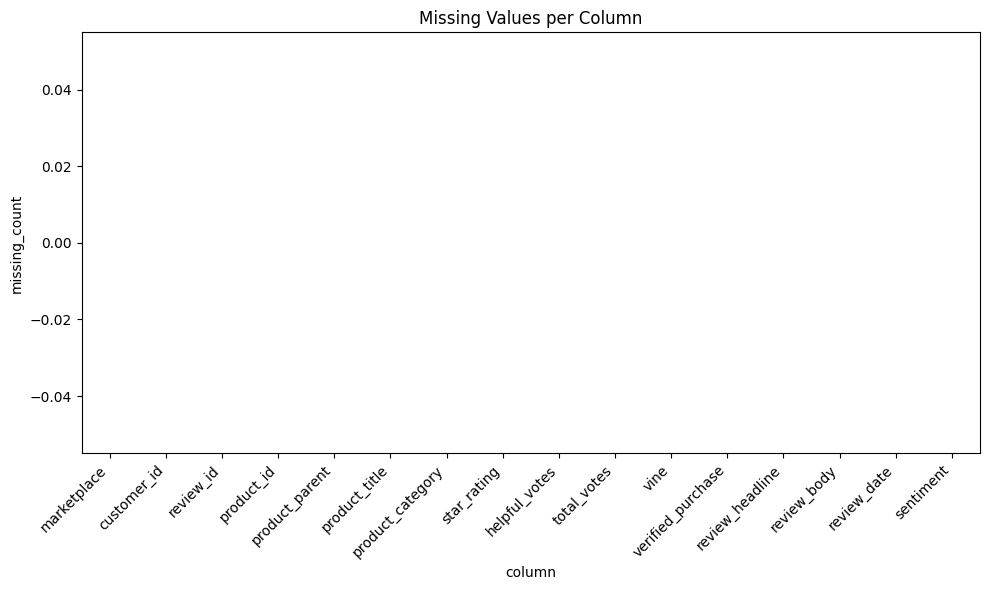

In [13]:
VisualAnalysisHelper.missing_values_plot(missing_values)

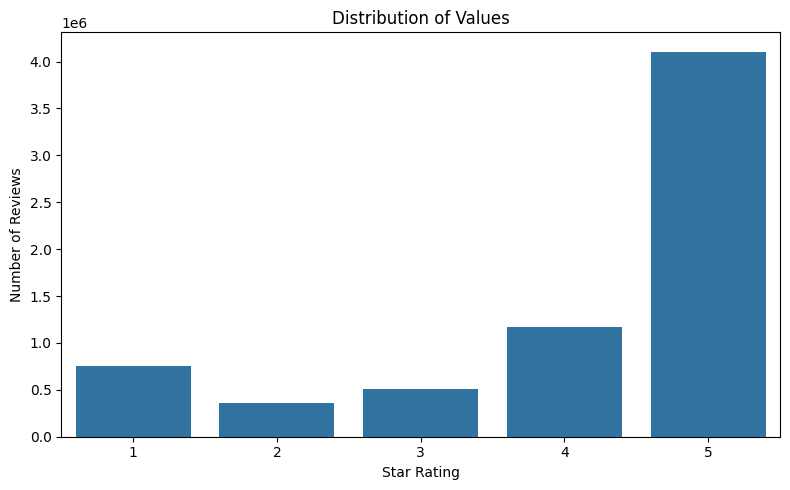

In [14]:
VisualAnalysisHelper.column_distribution_plot(df_reviews, "star_rating", "Star Rating", "Number of Reviews")

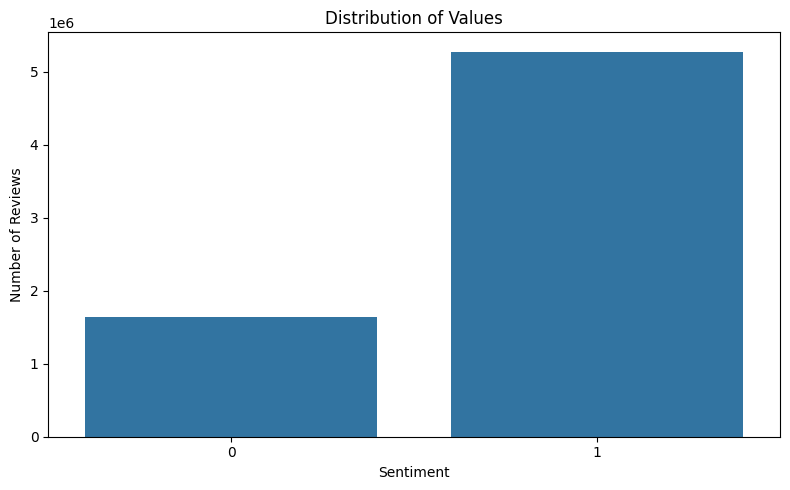

In [15]:
VisualAnalysisHelper.column_distribution_plot(df_reviews, "sentiment", "Sentiment", "Number of Reviews")

Despite the potential concerns regarding its authenticity, the dataset does show a certain level of consistency. For instance, as we can see above, the 5-star reviews align well with other attributes, such as the sentiment and the text provided in the review body. Positive reviews typically correlate with high ratings and sentiment scores, which makes sense and supports the integrity of the dataset, at least in this regard. This consistency is crucial for building reliable models, as it indicates that, despite the dataset's suspicious origin, it still follows logical patterns in terms of how reviews and ratings are structured.